NAME: __________________        CLASS: __________________     DATE: __________________

# Planetary Rings

© Dimitrios Theodorakis GNU General Public License v3.0 

https://github.com/DimitriosAstro/Astronomy

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from random import seed
from random import random
from IPython.display import Image
%matplotlib inline

### AIM - Visualise the rings of Saturn and calculate the Roche limit of some moons.
Difficulty: Easy

**Predict**

Have a think about these questions and make some predictions! Be sure to tell someone else what you predict.

1) What are planetary rings made from?  
2) What happens if a satellite gets too close to its parent planet?  
3) Do all planets have rings?

**Enter your predictions:**    
1)    
2)    
3)    

## Contents

* [Start](#Start)
* [Roche Limit](#Roche)
* [Challenges](#Challenges)
* [References](#References)

# Let's go: Visualising Saturn's Rings <a class="anchor" id="Start"></a>

The ***data*** directory contains csv files with data on the rings of the gas giants and their inner moons. There is also a ring file just for Saturn with a much more detailed ring structure.

We are going to use the file **planetary_rings.csv** to plot the structure of Saturn's rings and its inner moons. Let's start by loading the file and printing the first five rows:

In [2]:
file = './data/planetary_rings.csv'
df = pd.read_csv(file)
df.head()

,object,ring_name,ring_name_simp,min,max,width lower,width upper,od lower,od upper,df lower,df upper,notes
0,saturn,D,D,66000,74000.0,8000.0,8000.0,0.001,0.001,50.0,100.0,NaN
1,saturn,C,C,74490,91983.0,17493.0,17493.0,0.100,0.100,0.0,3.0,NaN
2,saturn,B,B,91983,117516.0,25533.0,25533.0,1.000,5.000,0.0,3.0,NaN
3,saturn,Cassini Division,CD,117516,122053.0,4537.0,4537.0,0.050,0.150,0.0,3.0,NaN
4,saturn,A,A,122053,136774.0,14721.0,14721.0,0.500,0.500,0.0,3.0,NaN


Here we see the first five rings of Saturn! There is a name and simplified name for plotting, the internal and external radius of the ring in km (min and max), the width of the ring, the optical density of the ring (how opaque it is), the dust fraction of the ring (how much of it is just dust), and finally any notes on that ring.

Let's extract the data for Saturn only and then get the ring names, min, max, and od values from the reduced dataframe:

In [3]:
# get saturn - locate rows where df['object'] -- 'saturn'
# Your code here:
saturn_rings = df.loc[df['object'] == 'saturn']

# get names, ring radii, and optical densities
# Your code here:
names = saturn_rings['ring_name_simp'].values
inner = saturn_rings['min'].values
outer = saturn_rings['max'].values

# For od take an average of the od lower and od upper columns
# Your code here:
od = (saturn_rings['od lower'] + saturn_rings['od upper'])/2
od = od.values

saturn_rings

,object,ring_name,ring_name_simp,min,max,width lower,width upper,od lower,od upper,df lower,df upper,notes
0,saturn,D,D,66000,74000.0,8000.0,8000.0,0.001000,0.001000,50.0,100.0,NaN
1,saturn,C,C,74490,91983.0,17493.0,17493.0,0.100000,0.100000,0.0,3.0,NaN
2,saturn,B,B,91983,117516.0,25533.0,25533.0,1.000000,5.000000,0.0,3.0,NaN
3,saturn,Cassini Division,CD,117516,122053.0,4537.0,4537.0,0.050000,0.150000,0.0,3.0,NaN
4,saturn,A,A,122053,136774.0,14721.0,14721.0,0.500000,0.500000,0.0,3.0,NaN
5,saturn,F,F,140175,140225.0,50.0,50.0,0.100000,0.500000,98.0,100.0,NaN
6,saturn,G,G,166000,173000.0,7000.0,7000.0,0.000001,0.000001,99.0,100.0,NaN
7,saturn,E,E,180000,450000.0,270000.0,270000.0,0.000010,0.000010,100.0,100.0,NaN


When we plot our rings we want the ring transparancy to be based off the optical density (higher od = lower transparency/more opaque). The following code snippet will calculate the alpha values for you. You don't need to alter the code block below just run it. As a challenge you could scale the transparency so that a drop in alpha of .1 is a 10 times drop in od.

In [4]:
# no need to change anything just RUN this code
# scale alphas based on od
alphas = []
for i in od:
    # max alpha is 1
    if i > 1:
        alphas.append(1)
    # threshold min for it to be visible
    elif i < 0.001:
        alphas.append(0.025)
    elif i < 0.01:
        alphas.append(i*100)
    else:
        alphas.append(i*1.8)
alphas

[0.1, 0.18000000000000002, 1, 0.18000000000000002, 0.9, 0.54, 0.025, 0.025]

Now let's start our plot. The first thing we'll do is set up our figure and axes, then plot a central circle for the planet: 

(-255530.0, 255530.0, -255530.0, 255530.0)

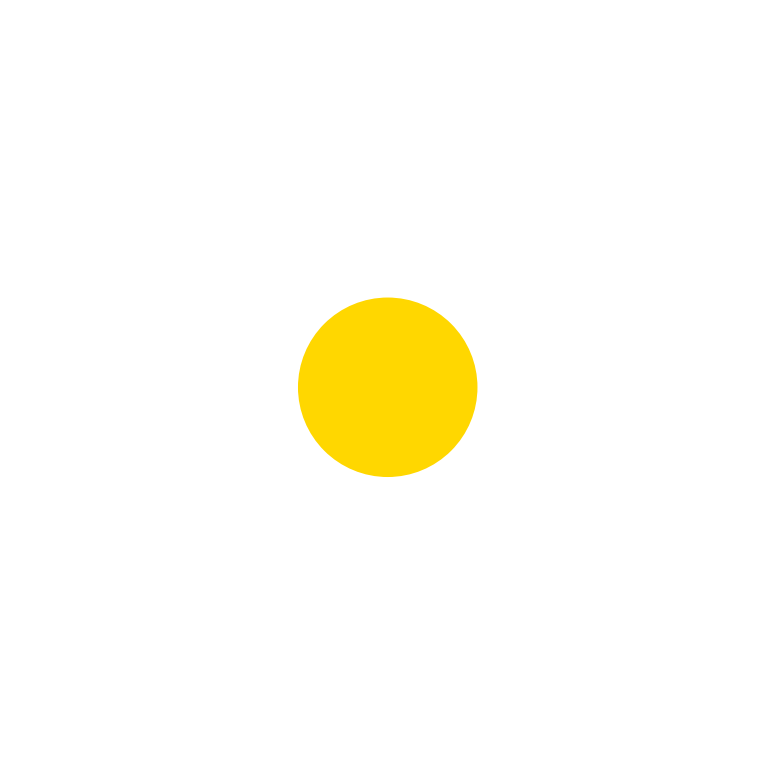

In [5]:
# finish setting up the figure and axes
# Your code here:
fig = plt.figure(num=1, figsize=(14, 14))
ax = plt.subplot(111)

# zorder counter
# this will make sure the next circle is plotted below the last
# (we will plot from the planet outwards)
z = 30

# plot the planet - get the radius of Saturn in km, turn of the edgecolor and pick a color
# after the add_artist() call take one away from z
# Your code here:
rad = 120536/2 # km
circle = Circle((0, 0), rad, color='gold', zorder=z, alpha=1, ec='None')
ax.add_artist(circle)
z -= 1

# leave this
limit = outer[-2]+80000
ax.set_xlim(-limit*1.01, limit*1.01)
ax.set_ylim(-limit*1.01, limit*1.01)
ax.set_aspect('equal')
ax.axis('off')

Now you have the planet plotted lets add the rings. For each ring we are going to add two circles. A white one with a radius equal to the inner radius of the ring (stored in the inner variable) and a coloured one with a radius equal to the outer radius of the ring (stored in the outer variable). The white circle will block out the parts of the coloured circle that aren't part of the ring. Complete the code block below to add the rings:

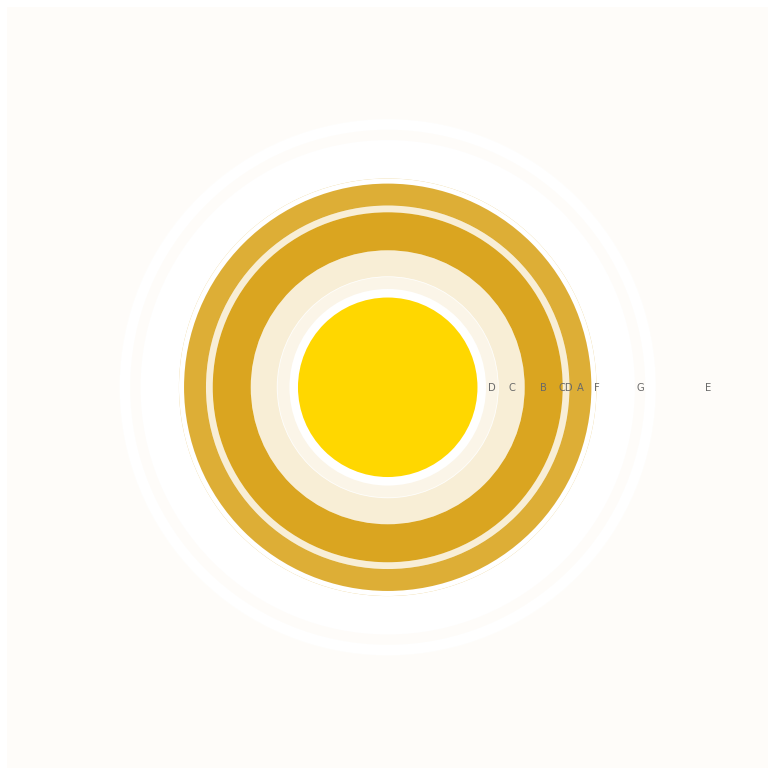

In [6]:
# the first circle will block out the inner part of the second creating a ring

for i in range(len(names)):
    # add the first white circle with a radius from inner
    # remember to take one from z after the add_artist() call
    # Your code here:
    circle = Circle((0, 0), inner[i], color='w', zorder=z, ec='None')
    ax.add_artist(circle)
    z -= 1
    # add the second coloured ring circle (pick a colour!)
    # remember to take one from z after the add_artist() call
    # Your code here:
    circle = Circle((0, 0), outer[i], color='goldenrod', zorder=z, alpha=alphas[i], ec='None')
    ax.add_artist(circle)
    z -=1
    # fix name locations
    # Get the middle of each ring and plot the name there as text 
    tx = (outer[i]-inner[i])/2 + inner[i]
    if names[i] == 'E': # this fixes the position of E - you can leave this as is
        tx = 215000
    ax.text(tx, 0, names[i], fontsize=10, color='dimgray', zorder=32, ha='center', va='center')
    
fig

Wow! The E ring extends much further out from Saturn but our limits chopped it off so that the inner rings are big enough to be visible in our image. You can clearly see rings B and A are the most reflective and the Cassini Division (CD) lies between them. The inner satellites of Saturn play an important role in maintaining the rings. Let's load the **saturns_moons.csv** and see what's inside:

In [7]:
# load moon data
moonfile = './data/saturn_moons.csv'
moons = pd.read_csv(moonfile)

moons = moons.loc[moons['Semimajor Axis'] <= moons.loc[moons['Name'] == 'Enceladus', 'Semimajor Axis'].iloc[0]]

moon_names = moons['Name'].values
moon_A = moons['Semimajor Axis'].values
moon_diam = moons['Mean Diameter'].values

moons

,Name,Semimajor Axis,Period,Eccentricity,Inclination,Mean Diameter,Mass,Associated Ring,Footnotes,Comments
0,Pan,133584.0,0.575,0.00001,0.0001,28.00,4.950000e+02,"A ring, Encke gap","4,8,9",NaN
1,Daphnis,136504.0,0.594,0.00003,0.0036,7.60,7.700000e+00,"A ring, Keeler gap","3,10",NaN
2,Atlas,137666.0,0.602,0.00120,0.0030,30.20,6.600000e+02,"A ring, Roche division","8,9",NaN
3,Prometheus,139378.0,0.613,0.00220,0.0070,84.20,1.590000e+04,"F ring, Roche division","8,9",Prometheus and Pandora interact to produce cha...
4,Pandora,141713.0,0.629,0.00420,0.0500,81.40,1.370000e+04,F ring,"8,9",Prometheus and Pandora interact to produce cha...
5,Epimetheus,151452.0,0.695,0.00970,0.3520,116.20,5.270000e+04,Janus/Epimetheus ring,"8,9",Janus and Epimetheus are ?coorbital? and under...
6,Janus,151452.0,0.695,0.00680,0.1640,178.00,1.900000e+05,Janus/Epimetheus ring,"8,9",Janus and Epimetheus are ?coorbital? and under...
7,Aegaeon,167494.0,0.808,0.00024,0.0010,0.66,3.500000e-08,G ring,7,Embedded in the G Ring.
8,Mimas,185537.0,0.942,0.01960,1.5650,396.00,3.750000e+06,"B ring, Cassini division, Huygens gap","5,8",NaN
9,Methone,194230.0,1.010,0.01000,0.0100,2.80,3.920000e+02,Methone ring,10,NaN


Here we've selected the first 13 moons up to Enceladus (the moon responsible for the E ring). Now we could just plot the moons all in a row using the Semimajor Axis column as the x or y position and 0 for the other coordinate or we can define a function to calculate the x and y displacements given a random location in its orbit (assuming it's circular). This way the moons will be randomly placed on a circle of radius equal to their semimajor axis. Complete the function below and call it to calculate the positions:

In [8]:
# rand pos for moons so that they're not all along a straight line
def moon_pos(A):
    seed(1) # this is not necessary - if you change the number the random positions will change
    # for each semimajor axis value A generate a random number using random()
    # Your code here:
    rands = [random() for i in range(len(A))]
    # turn it into an array using np.asarray(rands) and times it by 2 pi
    rands = np.asarray(rands) * 2 * np.pi 
    # now we have random angle from 0 to 2pi
    # calculate the x and y positions of the moon using trig ie x=Acos(rands)
    x = np.multiply(A, np.cos(rands))
    y = np.multiply(A, np.sin(rands))
    return x, y

moon_x, moon_y = moon_pos(moon_A)

Now we can add the moons as individual scatter points to our plot:

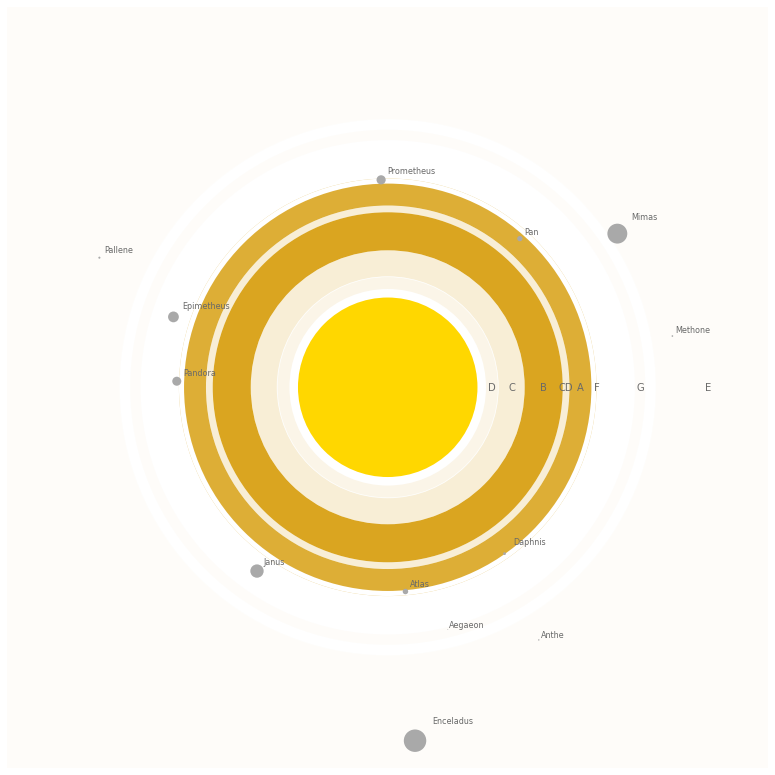

In [9]:
# plot moons and shift the text based on the diameter
for i in range(len(moons)):
    # plot the moon as a point below, scale the size based off the moon_diam 
    # remember s must take a list! (use a zorder of 31)
    # Your code here:
    ax.scatter(moon_x[i], moon_y[i], ec='None', s=[moon_diam[i]], color='darkgray', zorder=31)
    # This code below shifts the text labels so that they are offset correctly from the moons
    if moon_diam[i] < 1:
        shift = moon_diam[i]*1500
    elif moon_diam[i] < 20:
        shift = moon_diam[i]*800
    elif moon_diam[i] < 50:
        shift = moon_diam[i]*100
    elif moon_diam[i] < 120:
        shift = moon_diam[i]*50
    else:
        shift = moon_diam[i]*23
    textx = moon_x[i]+shift
    texty = moon_y[i]+shift
    # add the text label using the name from moon_names (use a zorder of 31)
    # Your code here:
    ax.text(textx, texty, moon_names[i], fontsize=8, color='dimgrey', zorder=31)
    
fig

Notice there are quite a few moons near or inside the rings! The moon Prometheus acts as a 'shephard' moon keeping the F ring in its narrow shape. The ice spewed out from Enceladus forms the E ring. So perhaps we should have coloured it a faint blue!

## Roche Limit <a class="anchor" id="Roche"></a>

If a moon gets too close to its parent planet it can be broken up by tidal forces. The side of the moon nearest to the parent planet has a greater force on it (and orbital velocity) than the side furthest away. If the tidal force can overcome the material strength of the moon it will break up into pieces and eventually spread out and form a ring.

We can approximate how close a moon needs to be to its parent planet before being broken up using the Roche limit. The equation for the roche limit is:

$$d\approx2.44R\left(\frac{\rho_M}{\rho_m}\right)^\frac{1}{3}$$

where $d$ is the Roche limit, $R$ is the radius of the parent planet/body, $\rho_M$ is the density of the parent planet/body, and $\rho_m$ is the density of the moon/satellite. Let's calculate the Roche limit for Mimas (the death star moon) and Pan (a ravioli moon), then plot the limit as a dashed circular line (by using a circle with an edge but no face).

Pan: 171824.3 km
Daphnis: 186829.3 km
Atlas: 168378.8 km
Prometheus: 162545.4 km
Pandora: 165137.6 km
Epimetheus: 150451.9 km
Janus: 150301.7 km
Aegaeon: 9794516.0 km
Mimas: 123731.4 km
Methone: 18572.0 km
Anthe: 182723.6 km
Pallene: 20386.8 km
Enceladus: 110683.9 km


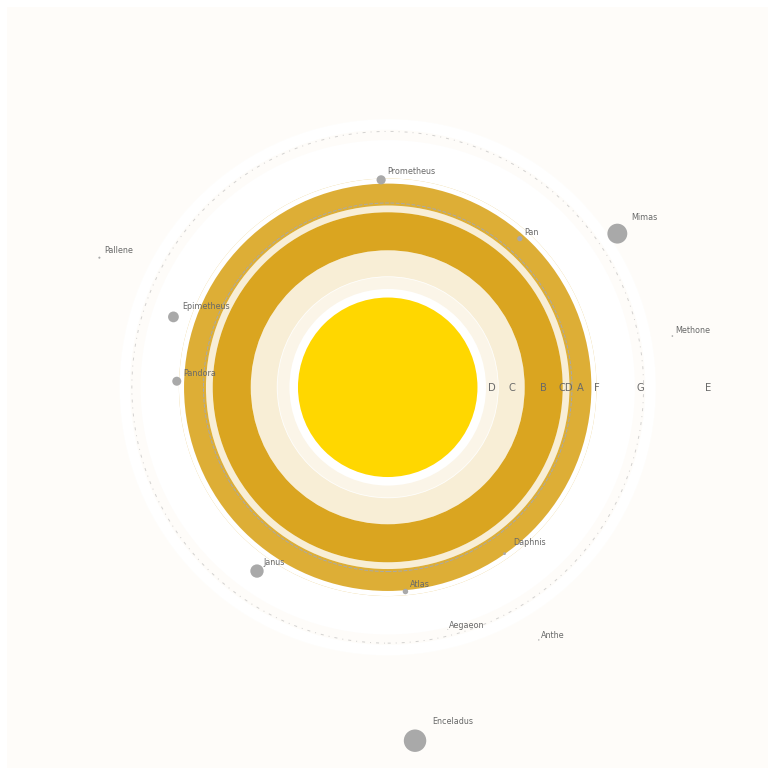

In [10]:
# Roche limits fluid

# the csv has no density column so these lines calculate it from the mass and diameters
moons['Density'] = moons['Mass']*10**13/(4/3*np.pi*(moons['Mean Diameter']/2*1000)**3)
moon_dens = moons['Density'].values # kg/m^3

# you will need to google the density of Saturn in kg/m^3
density = 687 # kg/m^3

# calculate the roche limits for all the planets and print them!
# Your code here:
roche = 2.44*rad*(density/moon_dens)**(1/3)
for m, r in zip(moon_names, roche):
    print(m+': {:.1f} km'.format(r))

# use the Circle() artist with fc='None' and ls='--' or ':' to get a circle with no fill just an edge
# use a zorder of 30 and pick a color
# Your code here:
# Pan
circle = Circle((0, 0), roche[0], ls=(0, (3, 5, 1, 5)), color='darkgray', zorder=30, fc='None', alpha=.5)
ax.add_artist(circle)
# Mimas
circle = Circle((0, 0), roche[-5], ls='--', color='darkgray', zorder=30, fc='None')
ax.add_artist(circle)

fig

At first glance everything looks ok but wait! The Roche limit for Pan is actually the dashed line near Mimas in the G ring. This means Pan is within the Roche limit so why hasn't it broken up? The equation we used above was the Roche limit for a fluid satellite which takes into account the deformation of the satellite (how deformed it is compared to a perfect sphere). The Roche limit for a rigid spherical satellite is:

$$d\approx R\left(2\frac{\rho_M}{\rho_m}\right)^\frac{1}{3}$$

Calculate the rigid Roche limit for Pan and add another dashed circle to the plot to show the limit:

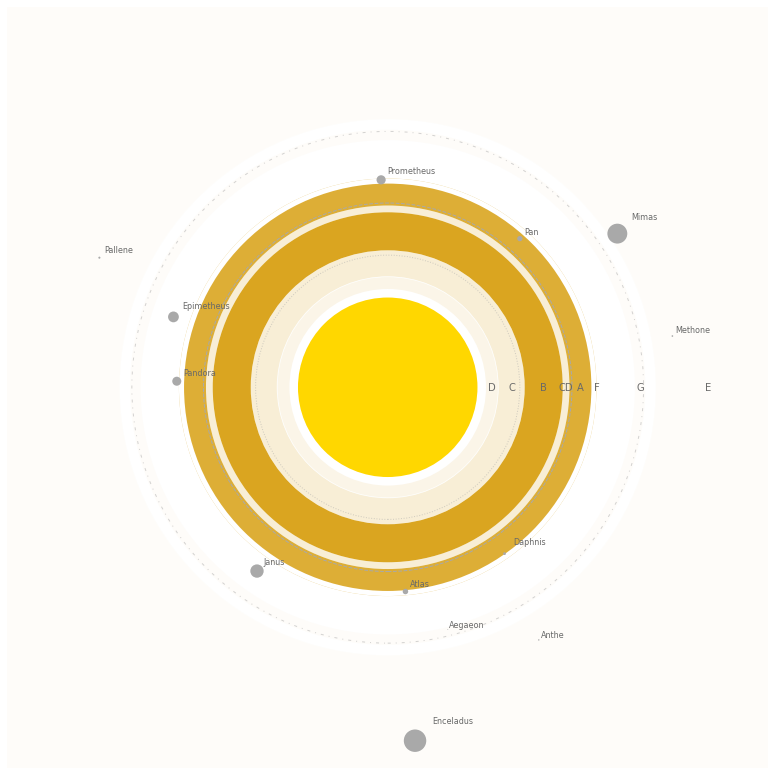

In [11]:
# Roche limit solid for Pan

# Your code here:
roche_pan_rigid = rad*(2*density/moon_dens[0])**(1/3)
circle = Circle((0, 0), roche_pan_rigid, ls=':', color='darkgray', zorder=30, fc='None', alpha=.5)
ax.add_artist(circle)

fig

Notice now that Pan is further out than the rigid Roche limit but within the fluid Roche limit. Several of Saturn's inner moons are in similar situations. They are also gradually moving towards Saturn as their orbits decay so we think they will break up soon and become ring material. 

Finally save your image:

In [12]:
fig.savefig('my_saturn_rings.png', dpi=150, bbox_inches='tight')

But what about the other gas giants? You can now attempt to plot their rings as well!  
A few things to note - some rings of Uranus and Neptune have no outer ring radius. Instead the min column is actually the radius to the center of the ring. You'll have to use this and the width to work out the inner and outer radii for the rings. For Uranus the greek letters in the ring names can cause Matplotlib grief if not handled properly. You can use the column 'ring_name_simp' to render the ring label text which has latex/mathsmode strings for the names.

Start with Jupiter which has a simple ring system before moving onto Neptune and Uranus. You can see what you're aiming for by loading the following image:

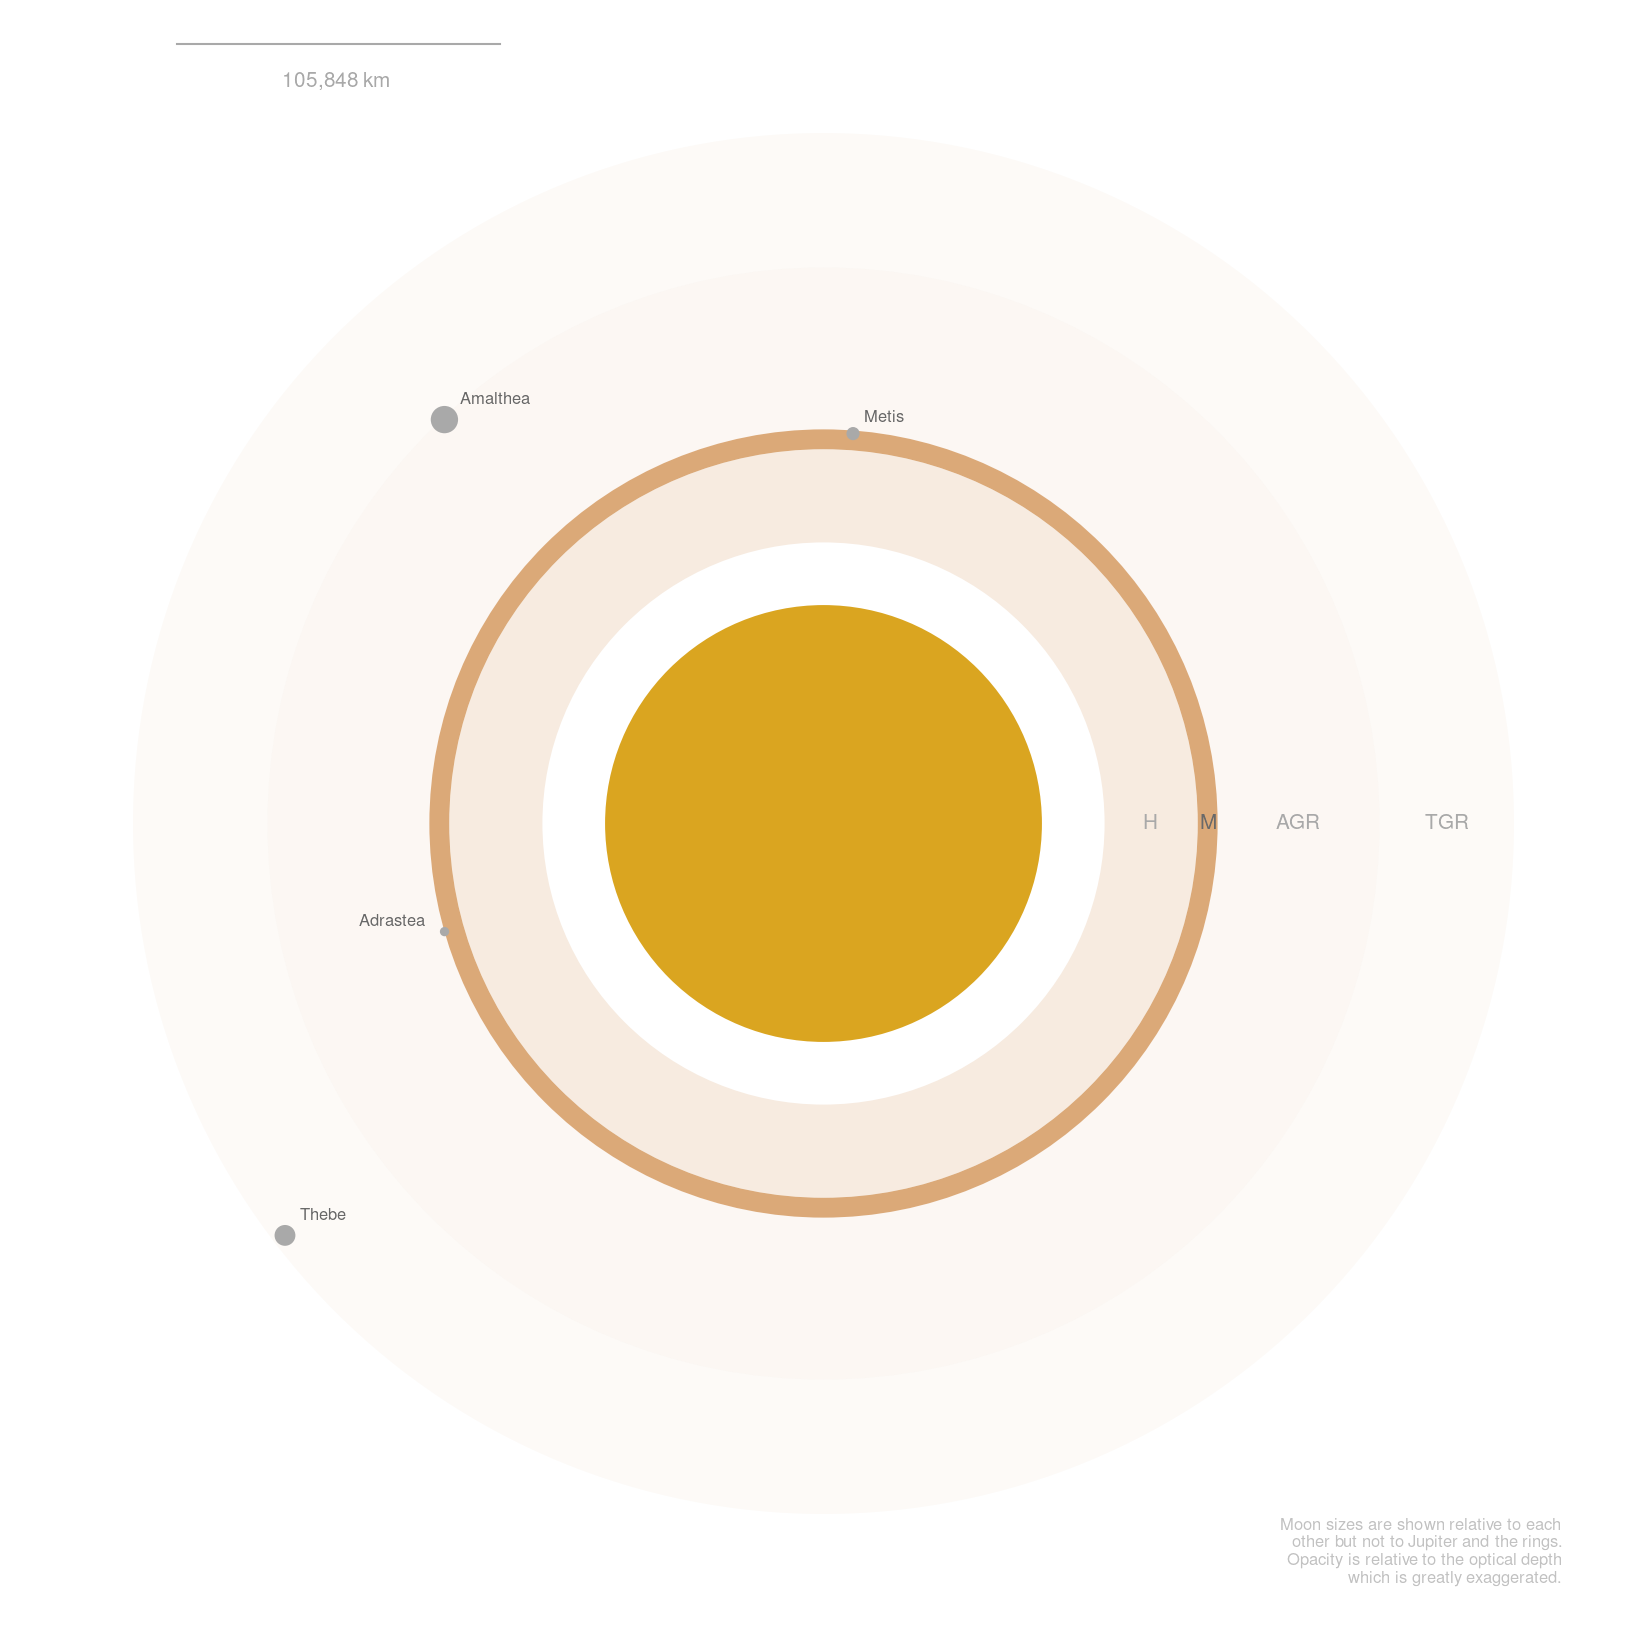

In [13]:
Image('./figures/jupiter_rings.png')

How do the rings of the other gas giants compare to Saturns?  
I suggest you take a look at some of the references (especially the David Simpson webpage [here](https://caps.gsfc.nasa.gov/simpson/kingswood/rings/)) to learn more about the features in the rings including how gaps are formed and the effects of certain moons on the rings.

## Challenge <a class="anchor" id="Challenges"></a>

1) Make similar plots for the ring systems of Jupiter, Uranus, and Neptune.  
2) Identify other moons inside the Roche limit (rigid or fluid) for each gas giant.  
3) Scale the transparency of each ring so that a drop of alpha by .1 corresponds to an order of magnitude drop in od.      

## References <a class="anchor" id="References"></a>

Roche Limit - [https://en.wikipedia.org/wiki/Roche_limit](https://en.wikipedia.org/wiki/Roche_limit)  
David Simpson, The Rings of Saturn - [https://caps.gsfc.nasa.gov/simpson/kingswood/rings/](https://caps.gsfc.nasa.gov/simpson/kingswood/rings/)  
C Porco et al. (2007) Saturn's Small Inner Satellites: Clues to Their Origins [http://ciclops.org/media/sp/2007/4691_10256_0.pdf](http://ciclops.org/media/sp/2007/4691_10256_0.pdf)  
Matthew Hedman, Planetary Ring Dynamics - [https://www.eolss.net/Sample-Chapters/C01/E6-119-55-13.pdf](https://www.eolss.net/Sample-Chapters/C01/E6-119-55-13.pdf)  
Sébastien Charnoz et al, Origin and Evolution of Saturn's Ring System - [Here](http://lasp.colorado.edu/~espoclass/ASTR_5835_Fall-2017-Review%20Chapters-Saturn/17-Origin%20and%20Evolution%20of%20Saturn%27s%20Ring%20System.pdf)

Data from:  
Ring-Moon Systems Node, SETI/NASA/JPL - [https://pds-rings.seti.org/](https://pds-rings.seti.org/)  

## Acknowledgements

Thanks to [Matthew M. Hedman](https://webpages.uidaho.edu/mhedman/) and [Larry Espocito](http://lasp.colorado.edu/~esposito/) for their help in locating data on planetary rings and satellites.